**Lesson 15 - Sentiment Analysis with supervised learning**

Another way to build a model to understand the text content and predict the sentiment of the text-based reviews is to use supervised machine learning. To be more specific, we use classification models for solving this problem. We build an automated sentiment text classification system in subsequent sections. The major steps to achieve this are as follows:
1. Prepare train and test datasets (optionally a validation dataset).
1. Preprocess and normalize text documents.
1. Feature engineering.
1. Model training.
1. Model prediction and evaluation.
 
These are the major steps for building our system. Figure shows a detailed workflow for building a standard text classification system with supervised learning (classification) models.

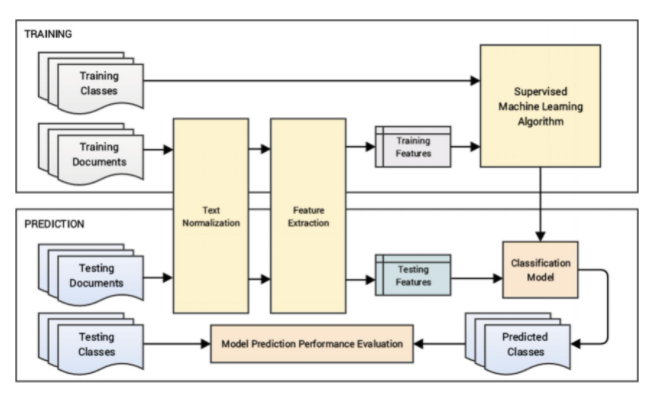

Figure source is `Text Analytics with Python: A Practical Real-World Approach to Gaining Actionable Insights from your Data` by Dipanjan Sarkar.

In our text, documents indicate the movie reviews and classes indicate the review sentiments, which can either be positive or negative, making it a binary classification problem. We will build models using traditional machine learning methods and the newer deep learning. 

# Load and normalize data

We can now load our IMDB movie reviews dataset, use the first 35,000 reviews fro training models, and save the remaining 15,000 reviews as the test dataset to evaluate model performance. Normalize also datasets.

In [1]:
%run load_movie_reviews.ipynb

# Traditional Supervised Machine Learning Models

We use traditional classification models to classify the sentiment of our movie revies. The feature techniques will be based on the bag of words and TF-IDF model. 

## Feature Engineering

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# build BOW features on train reviews
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1,2))
cv_train_features = cv.fit_transform(norm_train_reviews)
# build TFIDF features on train reviews
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(norm_train_reviews)

In [3]:
# transform test reviews into features
cv_test_features = cv.transform(norm_test_reviews)
tv_test_features = tv.transform(norm_test_reviews)

In [4]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (35000, 2092886)  Test features shape: (15000, 2092886)
TFIDF model:> Train features shape: (35000, 2092886)  Test features shape: (15000, 2092886)


We consider word and bi-grams for our feature sets. 

## Model Training, Prediction and Performance Evaluation

Use some traditional supervised ML techniques, which work very well on text classification.

In [5]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=100, C=1)
svm = SGDClassifier(loss='hinge', max_iter=100)

We try to prdict the probability that a given movie review will belong to one of the discrete classes (binary classes). The model tries to predict the sentiment class using the feature vector and the sigmoid function or logistic function. The main objective of this model is to search for an optimal value of theta, such that the probability of the positive sentiment class is maximum when the feature vector is for a positive movie review, and small when it is for a negative movie review.

We use `train_predict_model()` function available in the model_evaluation_utils module to build a logistic regression model on our test features (steps 4 and 5).

In [6]:
# Logistic Regression model on BOW features
lr_bow_predictions = meu.train_predict_model(classifier=lr, 
                                             train_features=cv_train_features, train_labels=train_sentiments,
                                             test_features=cv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_bow_predictions,
                                      classes=['positive', 'negative'])

C:\Users\Elisabetta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model Performance metrics:
------------------------------
Accuracy: 0.9048
Precision: 0.9048
Recall: 0.9048
F1 Score: 0.9048

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.90      0.91      0.91      7510
    negative       0.91      0.90      0.90      7490

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted_positive  Predicted_negative
Actual_positive                6814                 696
Actual_negative                 732                6758


We get an overall F1-score and model accuracy of 90.5%. 

We can now build a logistic regression model on TF-IDF features.

In [7]:
# Logistic Regression model on TF-IDF features
lr_tfidf_predictions = meu.train_predict_model(classifier=lr, 
                                               train_features=tv_train_features, train_labels=train_sentiments,
                                               test_features=tv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_tfidf_predictions,
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.8939
Precision: 0.894
Recall: 0.8939
F1 Score: 0.8939

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.89      0.90      0.89      7510
    negative       0.90      0.89      0.89      7490

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted_positive  Predicted_negative
Actual_positive                6768                 742
Actual_negative                 849                6641


We get an overall F1-score and model accuracy of 89%.

We can now use the support vector machine model on bag of words and TF-IDF features.

In [8]:
svm_bow_predictions = meu.train_predict_model(classifier=svm, 
                                             train_features=cv_train_features, train_labels=train_sentiments,
                                             test_features=cv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=svm_bow_predictions,
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.8965
Precision: 0.8973
Recall: 0.8965
F1 Score: 0.8964

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.88      0.92      0.90      7510
    negative       0.92      0.87      0.89      7490

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted_positive  Predicted_negative
Actual_positive                6908                 602
Actual_negative                 951                6539


In [9]:
svm_tfidf_predictions = meu.train_predict_model(classifier=svm, 
                                                train_features=tv_train_features, train_labels=train_sentiments,
                                                test_features=tv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=svm_tfidf_predictions,
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.8965
Precision: 0.8969
Recall: 0.8965
F1 Score: 0.8965

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.89      0.91      0.90      7510
    negative       0.91      0.88      0.89      7490

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted_positive  Predicted_negative
Actual_positive                6844                 666
Actual_negative                 886                6604


We get a maximum F1-score of 90%.

# Newer Supervised Deep Learning Models

The models in scikit-learn accept the sentiment class labels as positive and negative. In the deep learning models the sentiment labels have to be encoded. The text-based sentiment class labels are converted into one hot encoded vectors (step 2).  

In [10]:
#!pip install gensim
import gensim
import keras
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from sklearn.preprocessing import LabelEncoder
from keras.layers.normalization import BatchNormalization

## Prediction class label encoding

In [11]:
le = LabelEncoder()
num_classes=2 
# tokenize train reviews & encode train labels
tokenized_train = [tn.tokenizer.tokenize(text)
                   for text in norm_train_reviews]
y_tr = le.fit_transform(train_sentiments)
y_train = keras.utils.to_categorical(y_tr, num_classes)

# tokenize test reviews & encode test labels
tokenized_test = [tn.tokenizer.tokenize(text)
                   for text in norm_test_reviews]
y_ts = le.fit_transform(test_sentiments)
y_test = keras.utils.to_categorical(y_ts, num_classes)

In [12]:
# print class label encoding map and encoded labels
print('Sentiment class label map:', dict(zip(le.classes_, le.transform(le.classes_))))
print('Sample test label transformation:\n'+'-'*35,
      '\nActual Labels:', test_sentiments[:3], '\nEncoded Labels:', y_ts[:3], 
      '\nOne hot encoded Labels:\n', y_test[:3])

Sentiment class label map: {'negative': 0, 'positive': 1}
Sample test label transformation:
----------------------------------- 
Actual Labels: ['negative' 'positive' 'negative'] 
Encoded Labels: [0 1 0] 
One hot encoded Labels:
 [[1. 0.]
 [0. 1.]
 [1. 0.]]


From the output we can observe how our sentiment class labels have been encoded into numeric representations, which in turn have been converted into one hot encoded vectors.

## Feature Engineering with word embeddings

The feature selection is based on word embeddings (step 3). We set the size parameter to 500, representing the feature vector size to be 512 for each word.

We define a function that computes averaged word vector representations for any corpus of text documents.

Generate averaged word vector features from word2vec model.

The Word2Vec model feature are of size 500.

## Modeling with deep neural networks 

We can now proceed to step 4 of our classification system workflow, where we build and train a deep neural network on these features.

We use a fully-connected four layer deep neural network (multi-layer perceptron or deep ANN) for our model. Our model consists of three hidden layers of 512 neurons or units and one output layer with two units, which will be used to predict a positive or negative sentiment based onthe input layer features.

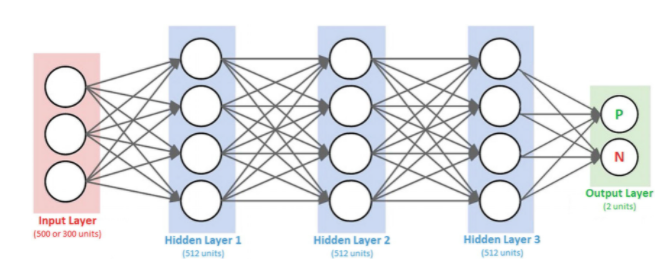

We call this a fully connected deep neural network (DNN) becuase neurons or units in each pair of adjacent layers are fully pairwise connected. These networks are also known as deep artificial neural networks (ANNs) or multi-layer perceptrons (MLPs) since they have more than one hidden layer. 

### Building Deep neural network architecture

The following function leverages Keras on top of TensorFlow to build the desired DNN model.

We accept a num_input_features parameter, which decisdes the number of units needed in the input layer (512 for Word2Vect features). We build a Sequential model, which helps us in linearly stacking our hidden and output layers.

We use 512 units for all our hidden layers and the activation function `relu` indicates a rectified linear unit. This function is typically defined as `relu(x) = max(0,x)` where `x` is the input to a neuron. This is the ramp function in electrical engineering. This function is preferable to the sigmoid function because it tries to solve the vanishing gradient problem, that occurs when `x>0` and as `x` increases, the gradient from sigmoids becomes very small, but `relu` prevents this from happening. `relu` also helps in faster convergence of gradient descent. 

We also use batch normalization technique that improves the performance and stability of neural networks. The key idea is to normalize the inputs of each layer in such a way that they have a mean output activation of 0 and standard deviation of 1. It is called batch normalization because during training, we normalize the activation of the previous layer for each batch, so we try to maintain the mean activation close to 0 and the standard deviation close to 1. Batch normalization try to keep the distribution fed to a neural unit constant.

We also use regularization in the form of `Dropout` layers. By adding a dropout rate of 0.2, it sets 20% of the inpute feature units to 0 at each update during training the model. This form of regularization helps prevent overfitting the model. 

The final output layer consists of two units with a `softmax` activation function. It is a generalization of the logistic function that can be used to represent a probability distribution over `n` possible class outcomes. `n=2` in this case, where the clas can either be positive or ngative and the softmax probabilities will help us determine the same. The binary softmax classifier sis also interchangeably known as the binary logistic regression fucntion. 

The `compile` method is used to configure the training process of the DNN model before we train it. This involves providing a cost or loss function in the loss parameter.  This will be the goal or objective that the model will try to minimize. There are various loss functions based on the type of problem you want to solve: check out [keras losses](https://keras.io/losses) for a list of possible loss functions. In this case we use the categorical_crossentropy (for classification) to minimize the error or loss from the softmax output. 

We need an optimized for converging our model and minimizing the loss or error function. The gradient descent is a popular optimizer. We use the `adam` optimizer which requires first order gradients and very little memory.

Finally, the `metrics` parameter specifies model performance metrics, which are used to evaluate the model when training.

Let's not build a DNN model based on our Word2Vec input feature representations for our training reviews.

### Visualize sample deep architecture

### Model Training, Prediction and Performance Evaluation

We now train our model on our training reviews dataset of Word2Vec features represented by `avg_wv_train_features` (step 4). We use the `fit()` function from Keras fro the training process.  

There are some parameters:
* `epoch` indicates one complete forward and backward pass of all the training examples
* `batch_size` indicates the total number of samples propagated through the DNN model at a time for one backward and forawrd pass for training the model and updating the gradient.

In case of 1,000 observations and a batch size of 100, each epoch will consist of 10 iterations, where 100 observations will be passed through the network at a time and the weights on the hidden layer units will be updated.

We also specify a validation_split of 0.1 to extract 10% of the training data and use it as a validation dataset for evaluating the performance at each epoch. The `shuffle` parameter shuffles the samples in each epoch when training the model.

We get a validation accuracy of close to 88%, which is quite good. It-s time now to put our model to the real test. Evaluate our model performance on the test review Word2Vec features (step 5).

The results show us that we have obtained a model accuracy and F1-score of 88%.